In [ ]:
!pip install folium matplotlib pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import geopandas as gpd
import folium


In [ ]:

# URL of the dataset
#data_url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$offset=10000'
data_url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.csv?$limit=1100000'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(data_url)

# Display the first few rows of the DataFrame
print(len(df))


1100000


In [ ]:
df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,13777896,JJ183487,2025-03-16T03:00:00.000,040XX N KEYSTONE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,39.0,16.0,08B,1148566.0,1926623.0,2025,2025-03-19T15:41:08.000,41.954594,-87.729245,"\n, \n(41.954593897, -87.729244692)"
1,13774329,JJ180265,2025-03-13T00:00:00.000,016XX S CALIFORNIA BLVD,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,24.0,29.0,06,1157960.0,1891622.0,2025,2025-03-20T15:44:59.000,41.858361,-87.695667,"\n, \n(41.85836136, -87.69566726)"
2,13779657,JJ186691,2025-03-13T00:00:00.000,010XX W 77TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,True,...,17.0,71.0,11,NaN,NaN,2025,2025-03-20T15:44:59.000,NaN,NaN,NaN
3,13774367,JJ180348,2025-03-13T00:00:00.000,003XX E 76TH ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,6.0,69.0,02,1179971.0,1854700.0,2025,2025-03-20T15:44:59.000,41.756567,-87.616005,"\n, \n(41.756567256, -87.616004765)"
4,13775254,JJ181236,2025-03-13T00:00:00.000,059XX S CICERO AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,13.0,64.0,07,1145701.0,1865024.0,2025,2025-03-20T15:44:59.000,41.785614,-87.741339,"\n, \n(41.785613571, -87.741338682)"


In [ ]:
  min_date = df['date'].min()
  max_date = df['date'].max()

  print(f"Minimum Date: {min_date}")
  print(f"Maximum Date: {max_date}")

Minimum Date: 2020-08-01T15:00:00.000
Maximum Date: 2025-03-16T03:00:00.000


In [ ]:
# Filter the DataFrame to include only rows before 2025
data_filter = df[(df['date'] < '2025-01-01') & (df['date'] >= '2021-01-01')]
# Display the first few rows of the filtered DataFrame
print(len(data_filter))
data_filter.head()

969780


,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
41103,13709672,JJ101940,2024-12-31T23:58:00.000,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5.0,43.0,14,1186817.0,1860189.0,2024,2025-01-08T15:42:09.000,41.771470,-87.590742,"\n, \n(41.771470188, -87.59074212)"
41104,13707925,JJ100089,2024-12-31T23:56:00.000,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3.0,38.0,26,1179661.0,1873623.0,2024,2025-01-08T15:42:09.000,41.808501,-87.616563,"\n, \n(41.808500903, -87.616562762)"
41105,13708038,JJ100035,2024-12-31T23:55:00.000,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18.0,70.0,04B,1145740.0,1853048.0,2024,2025-01-08T15:42:09.000,41.752749,-87.741498,"\n, \n(41.752748627, -87.741497836)"
41106,13709164,JJ101392,2024-12-31T23:53:00.000,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20.0,42.0,14,1184362.0,1861188.0,2024,2025-01-08T15:42:09.000,41.774269,-87.599710,"\n, \n(41.774269351, -87.599709962)"
41107,13707823,JJ100020,2024-12-31T23:50:00.000,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29.0,25.0,08B,1137458.0,1907694.0,2024,2025-01-08T15:42:09.000,41.902858,-87.770537,"\n, \n(41.902858242, -87.770536741)"


In [ ]:
data_filter.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [ ]:
data_filter['primary_type'].unique()

array(['CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'BATTERY',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'WEAPONS VIOLATION',
       'ASSAULT', 'THEFT', 'DECEPTIVE PRACTICE',
       'CRIMINAL SEXUAL ASSAULT', 'ROBBERY',
       'CONCEALED CARRY LICENSE VIOLATION', 'BURGLARY', 'STALKING',
       'NARCOTICS', 'LIQUOR LAW VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'ARSON', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'INTIMIDATION', 'GAMBLING', 'PROSTITUTION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION'], dtype=object)

In [ ]:
data_filter['primary_type'].value_counts()

,count
primary_type,
THEFT,213546
BATTERY,171717
CRIMINAL DAMAGE,110965
ASSAULT,87231
MOTOR VEHICLE THEFT,83000
DECEPTIVE PRACTICE,67659
OTHER OFFENSE,61276
ROBBERY,37057
WEAPONS VIOLATION,34205


In [ ]:
data_filter.count()

,0
id,969780
case_number,969780
date,969780
block,969780
iucr,969780
primary_type,969780
description,969780
location_description,965103
arrest,969780
domestic,969780


<ipython-input-11-aadad16ebcf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['date'] = pd.to_datetime(data_filter['date'])
<ipython-input-11-aadad16ebcf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['year'] = data_filter['date'].dt.year


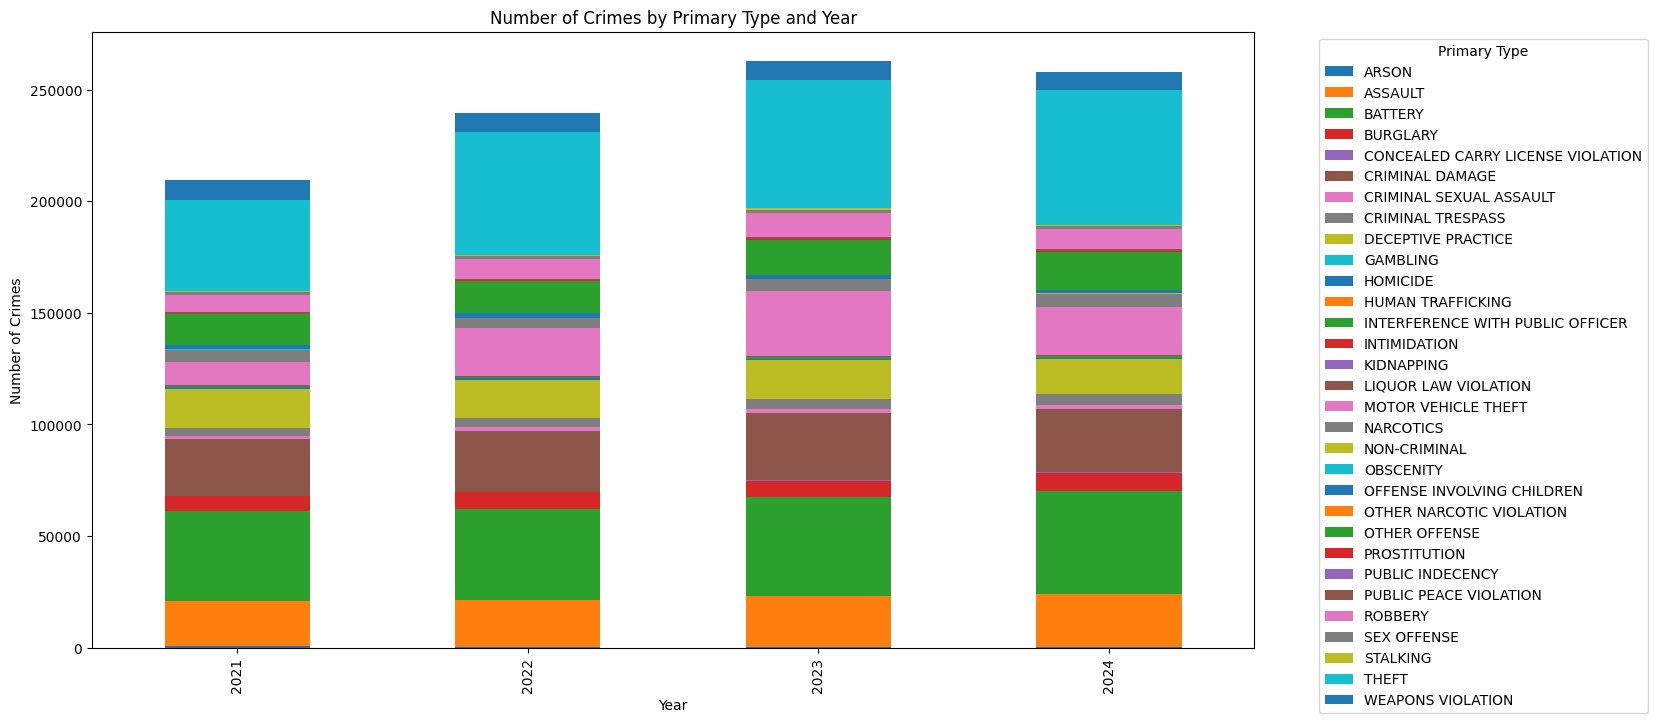

In [ ]:
# Convert the 'date' column to datetime objects
data_filter['date'] = pd.to_datetime(data_filter['date'])

# Extract the year from the 'date' column
data_filter['year'] = data_filter['date'].dt.year


# Group the data by year and primary_type, and count the number of occurrences
crime_counts_by_year = data_filter.groupby(['year', 'primary_type'])['primary_type'].count().unstack()

# Plot the stacked bar chart
ax = crime_counts_by_year.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Primary Type and Year')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-12-2a2b3b3479a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['month_year'] = data_filter['date'].dt.strftime('%Y-%m')


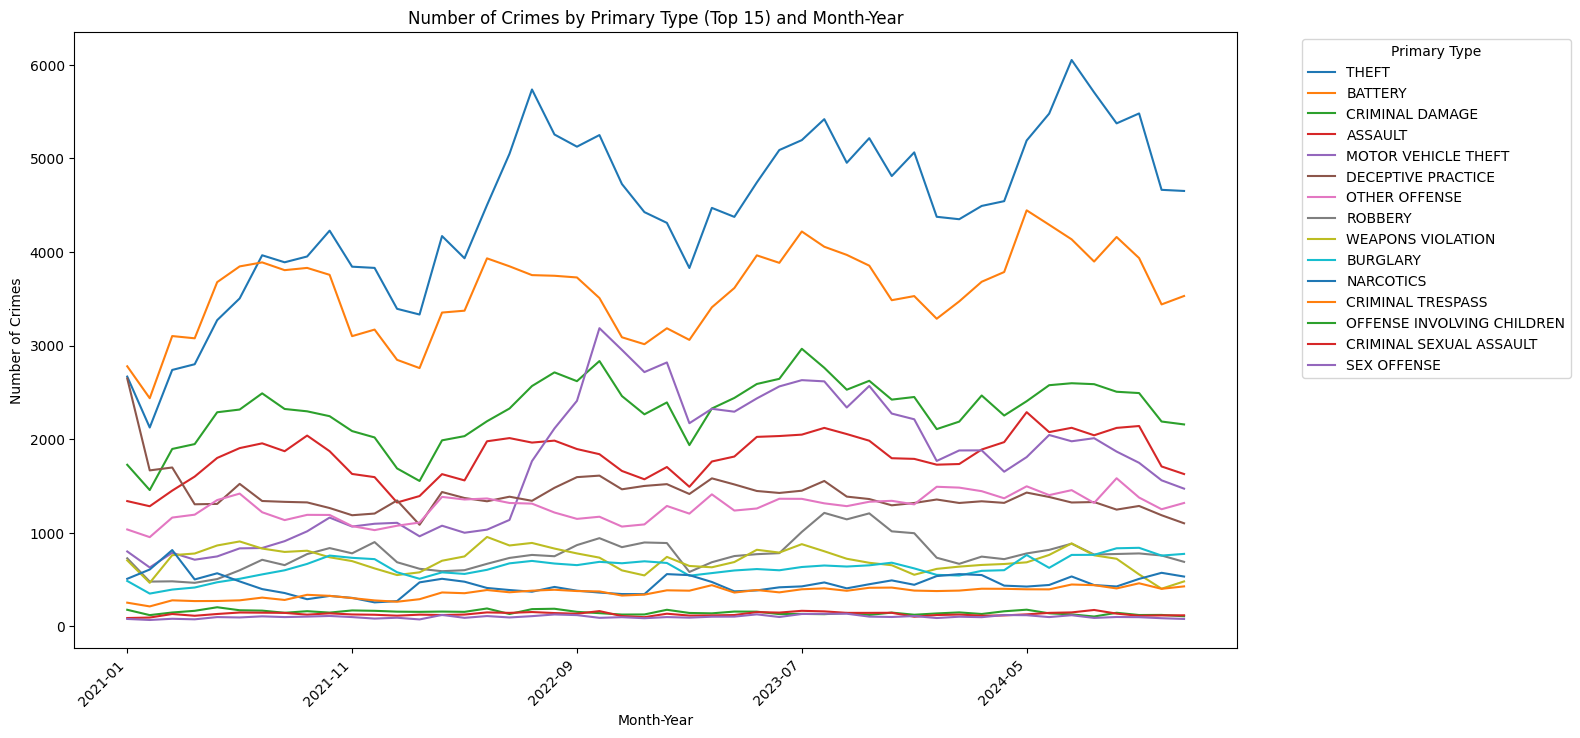

In [ ]:

data_filter['month_year'] = data_filter['date'].dt.strftime('%Y-%m')

# Group by month_year and primary_type, then count occurrences
crime_counts_by_month_year = data_filter.groupby(['month_year', 'primary_type'])['primary_type'].count().unstack()

# Get top 15 primary types
top_15_primary_types = data_filter['primary_type'].value_counts().nlargest(15).index

# Filter the crime counts to include only the top 15 primary types
crime_counts_by_month_year = crime_counts_by_month_year[top_15_primary_types]

# Plot the line graph
ax = crime_counts_by_month_year.plot(kind='line', figsize=(15, 8))
plt.xlabel('Month-Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Primary Type (Top 15) and Month-Year')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


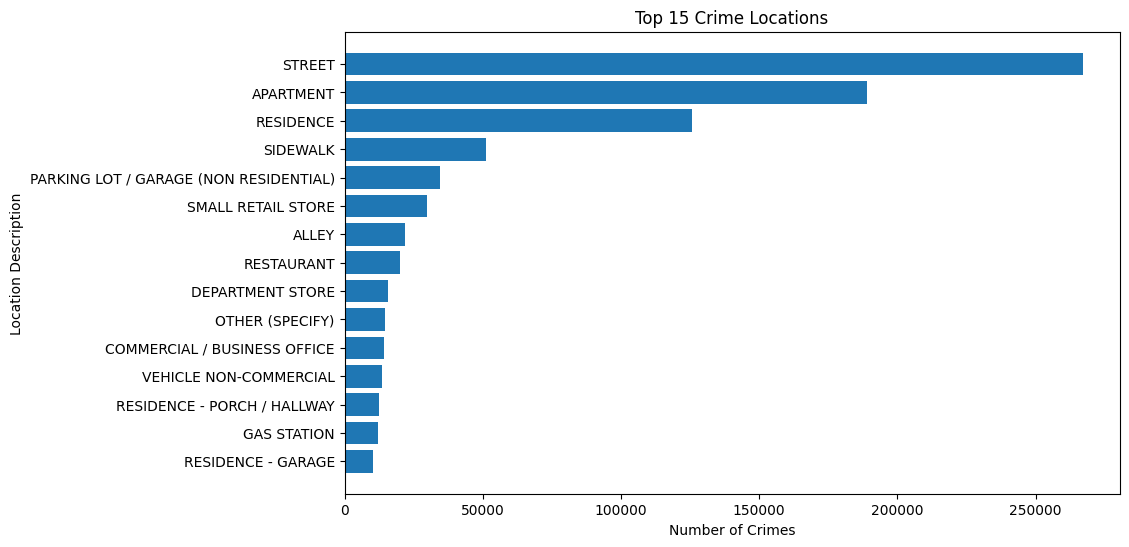

In [ ]:
# Group the data by location_description and count occurrences
location_counts = data_filter['location_description'].value_counts()

# Select the top N locations for visualization (e.g., top 15)
top_n = 15
top_locations = location_counts.nlargest(top_n)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(top_locations.index, top_locations.values)
plt.xlabel('Number of Crimes')
plt.ylabel('Location Description')
plt.title('Top {} Crime Locations'.format(top_n))
plt.gca().invert_yaxis()  # Invert y-axis to show the most frequent location at the top
plt.show()


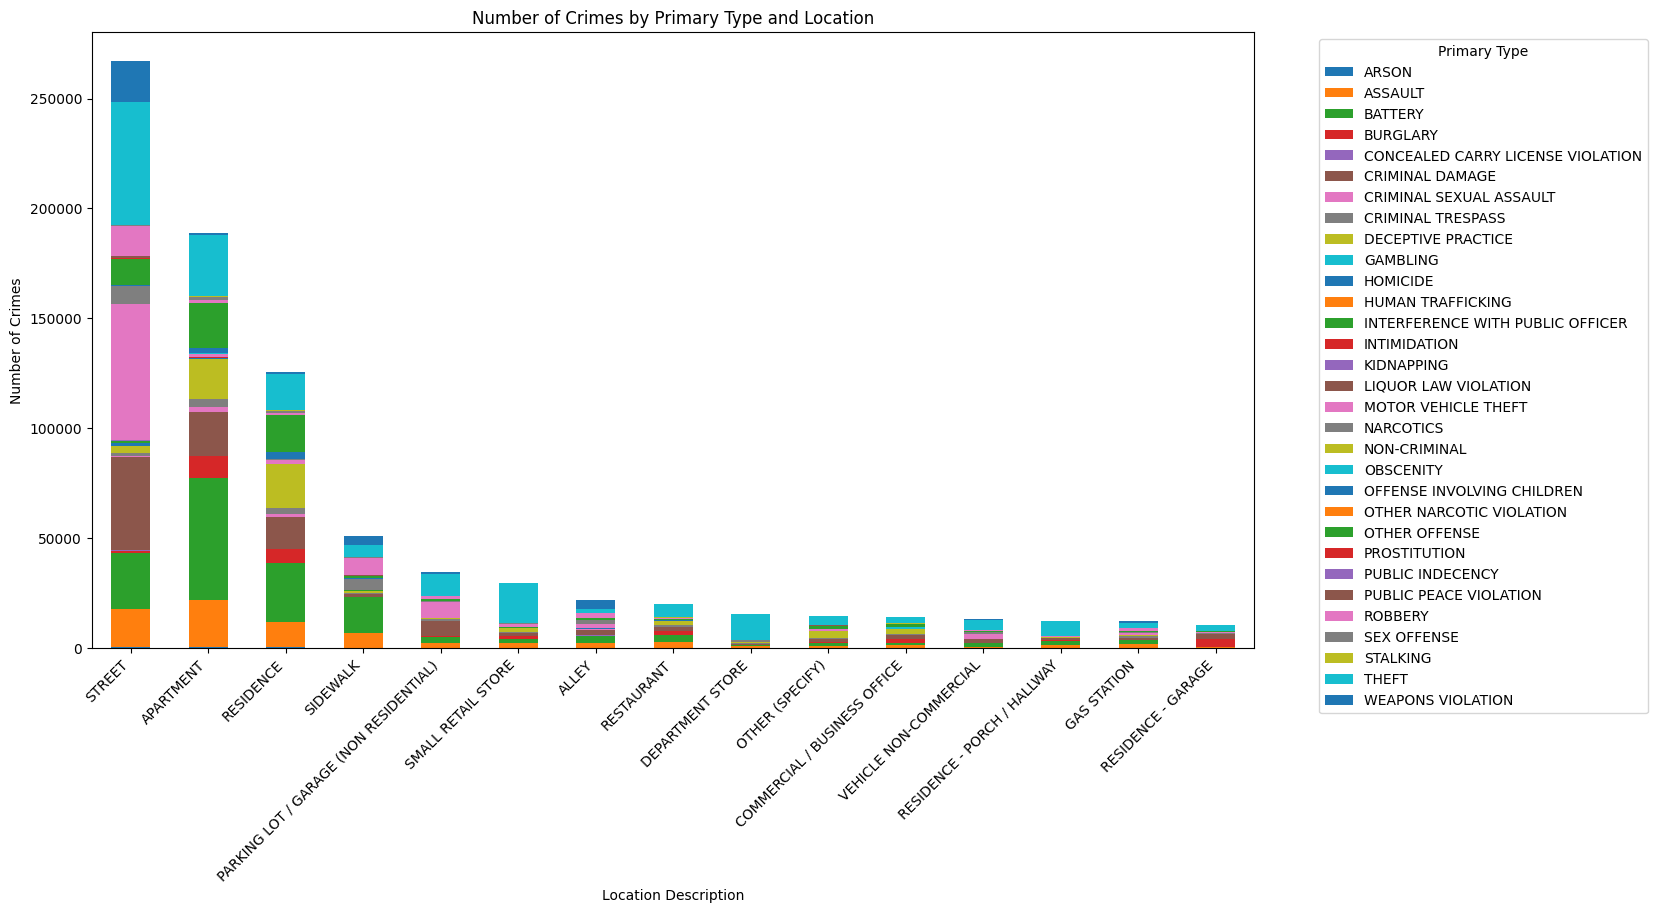

In [ ]:
# Group the data by location_description and primary_type, then count occurrences
location_primary_type_counts = data_filter.groupby(['location_description', 'primary_type'])['primary_type'].count().unstack()

# Select the top N locations for visualization (e.g., top 15)
top_n = 15
top_locations = location_primary_type_counts.sum(axis=1).nlargest(top_n).index

# Filter the data to include only the top locations
location_primary_type_counts = location_primary_type_counts.loc[top_locations]

# Plot the stacked bar chart
ax = location_primary_type_counts.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Primary Type and Location')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 969780 entries, 41103 to 1010882
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    969780 non-null  int64         
 1   case_number           969780 non-null  object        
 2   date                  969780 non-null  datetime64[ns]
 3   block                 969780 non-null  object        
 4   iucr                  969780 non-null  object        
 5   primary_type          969780 non-null  object        
 6   description           969780 non-null  object        
 7   location_description  965103 non-null  object        
 8   arrest                969780 non-null  bool          
 9   domestic              969780 non-null  bool          
 10  beat                  969780 non-null  int64         
 11  district              969780 non-null  int64         
 12  ward                  969756 non-null  float64       
 13 

In [ ]:
data_filter.describe()

,id,date,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,9.697800e+05,969780,969780.000000,969780.000000,969756.000000,969778.000000,9.566180e+05,9.566180e+05,969780.000000,956618.000000,956618.000000
mean,1.295984e+07,2023-02-06 03:49:02.462325760,1154.871331,11.319120,23.215072,36.427723,1.165284e+06,1.887044e+06,2022.586588,41.845629,-87.668955
min,2.569900e+04,2021-01-01 00:00:00,111.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,2021.000000,36.619446,-91.686566
25%,1.263789e+07,2022-03-04 05:05:00,533.000000,5.000000,10.000000,22.000000,1.153849e+06,1.859437e+06,2022.000000,41.769671,-87.710547
50%,1.299811e+07,2023-02-22 19:30:00,1033.000000,10.000000,24.000000,32.000000,1.167108e+06,1.893288e+06,2023.000000,41.862916,-87.662141
75%,1.335476e+07,2024-01-25 21:30:00,1731.000000,17.000000,34.000000,53.000000,1.176784e+06,1.910189e+06,2024.000000,41.909422,-87.626897
max,1.378090e+07,2024-12-31 23:58:00,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951506e+06,2024.000000,42.022549,-87.524529
std,8.047740e+05,NaN,707.453609,7.070372,14.021252,21.597904,1.645271e+04,3.189064e+04,1.098169,0.087703,0.059866


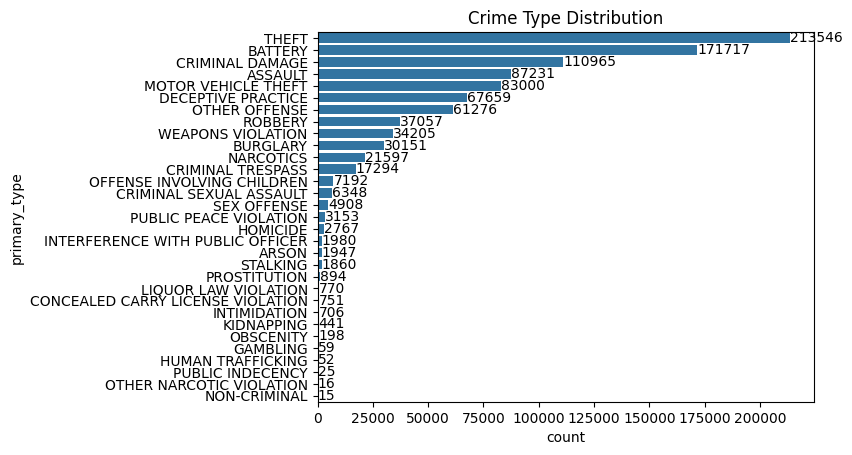

In [ ]:
# Create the countplot
ax = sns.countplot(y=data_filter["primary_type"], order=data_filter["primary_type"].value_counts().index)
plt.title("Crime Type Distribution")

# Add value counts to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 2, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center')

plt.show()


<ipython-input-18-4be03f54d881>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date"] = pd.to_datetime(data["date"])
<ipython-input-18-4be03f54d881>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["YearMonth"] = data["date"].dt.to_period("M")
<ipython-input-18-4be03f54d881>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

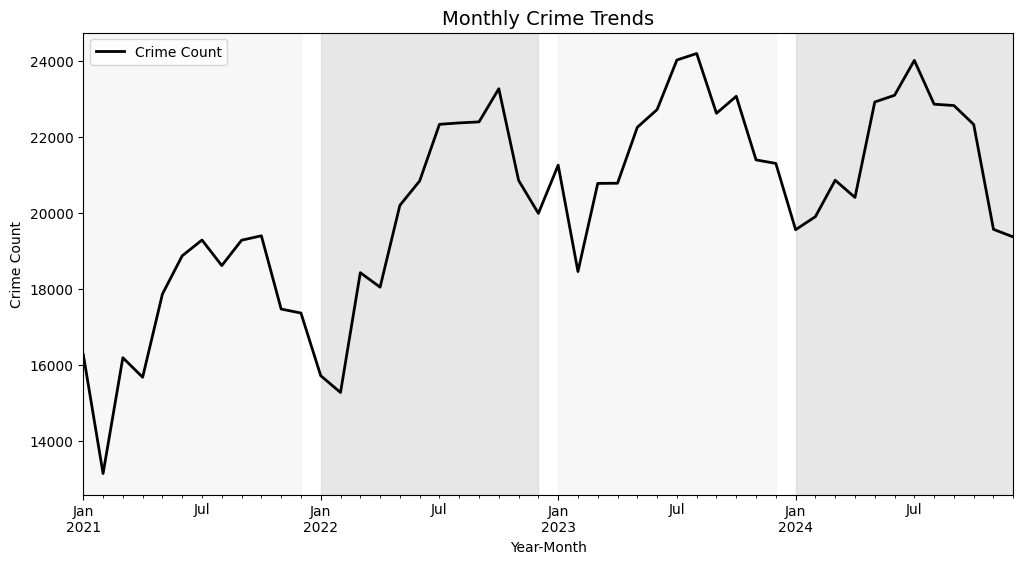

In [ ]:
# Convert date column to datetime
data = data_filter
data["date"] = pd.to_datetime(data["date"])

# Aggregate crime counts per month
data["YearMonth"] = data["date"].dt.to_period("M")
data["Year"] = data["date"].dt.year
crime_trends = data.groupby("YearMonth")["primary_type"].count()

# Plot crime trends
fig, ax = plt.subplots(figsize=(12, 6))
crime_trends.plot(ax=ax, color="black", linewidth=2, label="Crime Count")

# Highlight each year with alternating background colors
years = sorted(data["Year"].unique())
for i, year in enumerate(years):
    start = pd.to_datetime(f"{year}-01-01")
    end = pd.to_datetime(f"{year}-12-31")
    color = "#f0f0f0" if i % 2 == 0 else "#d0d0d0"  # Alternating shades
    ax.axvspan(start, end, color=color, alpha=0.5)

# Labels & title
ax.set_title("Monthly Crime Trends", fontsize=14)
ax.set_xlabel("Year-Month")
ax.set_ylabel("Crime Count")
ax.legend()
plt.show()

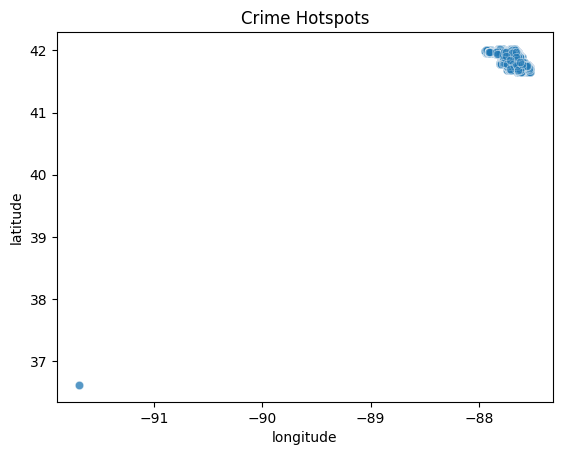

In [ ]:

# Assuming data has 'Latitude' & 'Longitude' columns
sns.scatterplot(x=data["longitude"], y=data["latitude"], alpha=0.5)
plt.title("Crime Hotspots")
plt.show()

In [ ]:
# # Define color map for crime types
# crime_types = data["primary_type"].unique()
# color_palette = sns.color_palette("husl", len(crime_types))  # Unique colors
# crime_color_map = dict(zip(crime_types, [mcolors.rgb2hex(c) for c in color_palette]))

# # Create a Folium map centered around the mean location
# crime_map = folium.Map(location=[data["latitude"].mean(), data["longitude"].mean()], zoom_start=13)

# # Add crime hotspots to the map, but only if latitude and longitude are valid
# for _, row in data.iterrows():
#     # Check if latitude and longitude are not NaN
#     if pd.notna(row["latitude"]) and pd.notna(row["longitude"]):
#         folium.CircleMarker(
#             location=[row["latitude"], row["longitude"]],
#             radius=6,
#             color=crime_color_map[row["primary_type"]],
#             fill=True,
#             fill_color=crime_color_map[row["primary_type"]],
#             fill_opacity=0.7,
#             popup=row["primary_type"]
#         ).add_to(crime_map)

# # Show the map
# crime_map

In [ ]:
# prompt: drop column year

# Assuming 'data_filter' is your DataFrame
if 'year' in data.columns:
  data = data.drop('year', axis=1)


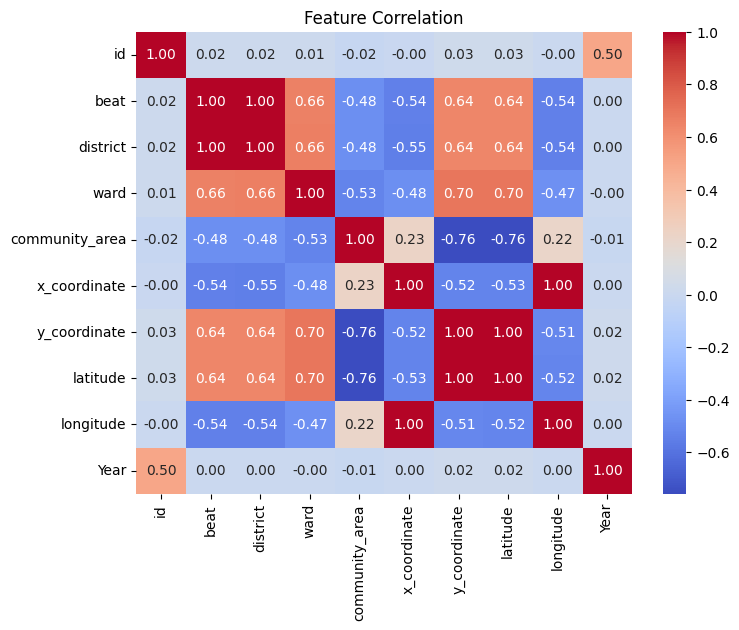

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
numerical_data = data.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

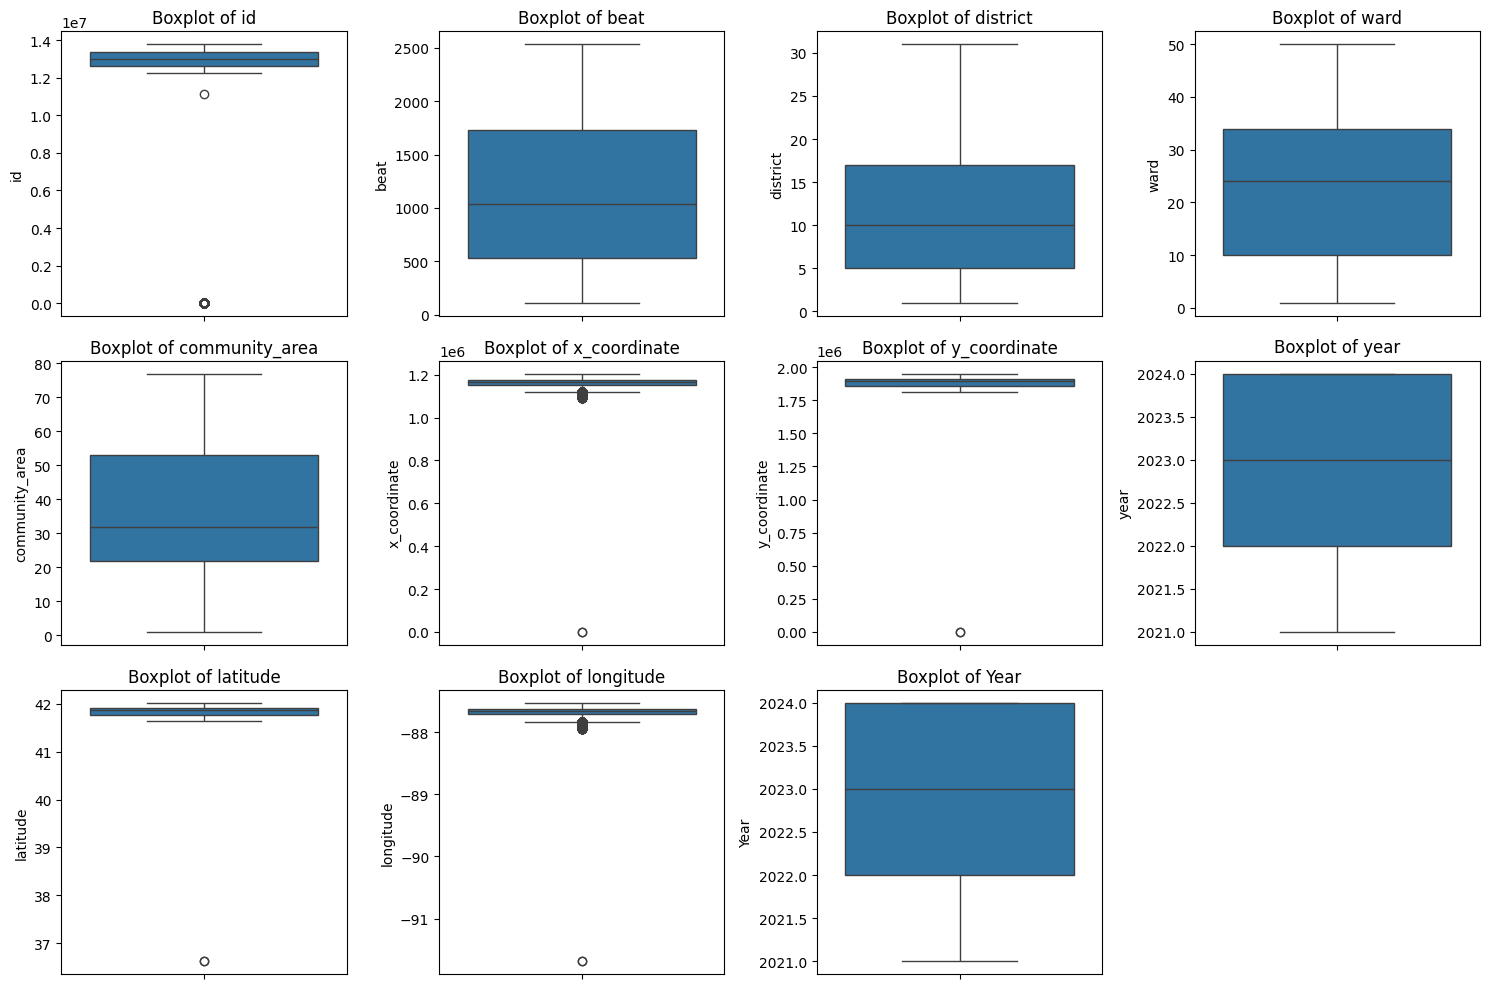

In [ ]:
# Plot all numerical features as boxplots
plt.figure(figsize=(15, 10))

# Change the subplot layout to accommodate all columns
for i, col in enumerate(numerical_data):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=numerical_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()